In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [19]:
file_path = r"C:\Users\sachi\OneDrive\Desktop\New folder\Winter Semester 2\CompanionAsset_9780128219294_Chapter04\Chapter 4\K-means Clustering\Chapter4_Geologic_DataSet.xlsx"
df=pd.read_excel(file_path)
df.describe()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,157.972603,2.242265,22.438356,0.159863,20.283105,9935.125571
std,30.396528,0.019978,7.971895,0.037465,3.187825,827.981530
min,66.000000,2.209100,5.000000,0.100000,10.000000,8046.000000
25%,139.000000,2.226425,17.000000,0.130000,19.000000,9372.250000
50%,155.000000,2.239300,22.000000,0.150000,20.000000,9844.500000
75%,178.000000,2.255925,26.000000,0.190000,22.000000,10440.000000
max,259.000000,2.319600,49.000000,0.310000,33.000000,12474.000000


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
df_scaled=scaler.transform(df)

In [22]:
df_scaled

array([[-1.31654221, -1.63691997,  0.07053355, -0.79799783,  0.85324677,
         0.88856422],
       [ 0.39613573, -1.19092098, -0.18063471,  0.27088   , -0.08890975,
        -0.00377924],
       [ 0.26439127, -0.81507913, -1.05972362,  1.07253837,  0.22514243,
        -0.22746968],
       ...,
       [-0.03203375,  0.96891686, -0.30621884,  0.27088   , -0.7170141 ,
        -1.12102229],
       [-0.52607547,  0.50287296, -1.05972362,  1.33975783,  0.5391946 ,
         0.55846969],
       [-0.32845878, -0.45928217, -0.43180297,  0.27088   ,  1.16729895,
        -0.65913177]])

D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

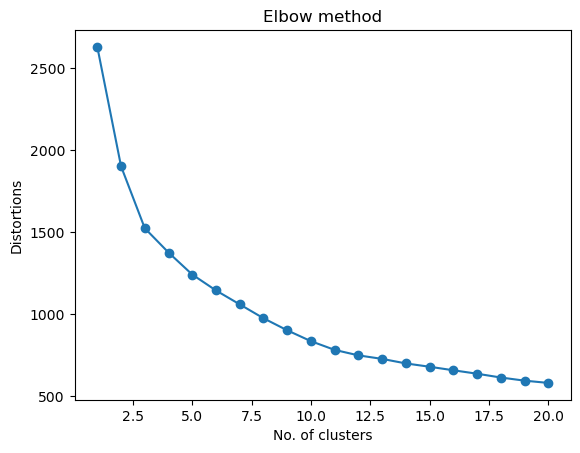

In [23]:
dis = []
for i in range(1, 21):
    kmean = KMeans(n_clusters=i, random_state=10000, init='k-means++', n_init=10, max_iter=300)
    kmean.fit(df_scaled)
    dis.append(kmean.inertia_)
plt.plot(range(1, 21), dis, marker='o')
plt.xlabel('No. of clusters')
plt.ylabel('Distortions')
plt.title('Elbow method')
plt.show()


In [24]:
km = KMeans(n_clusters=10, random_state=100, init='k-means++', n_init=10, max_iter=300)
km.fit(df_scaled)
labels = km.labels_
labels

D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 6, 6, 6, 2, 7, 5, 1, 3, 3, 0, 7, 0, 0, 3, 5, 1, 0, 1, 9, 9, 3,
       1, 8, 9, 6, 7, 6, 1, 6, 4, 0, 3, 0, 6, 4, 9, 3, 2, 7, 7, 0, 0, 6,
       9, 7, 8, 9, 1, 0, 9, 9, 2, 2, 2, 8, 1, 2, 3, 0, 6, 2, 1, 7, 6, 3,
       1, 5, 5, 3, 6, 6, 1, 2, 8, 5, 1, 0, 4, 9, 7, 6, 3, 3, 3, 1, 7, 0,
       9, 2, 2, 5, 1, 3, 3, 0, 0, 0, 0, 4, 7, 3, 3, 2, 6, 7, 2, 2, 4, 7,
       7, 8, 2, 2, 2, 9, 1, 8, 3, 9, 7, 0, 6, 3, 6, 5, 6, 9, 9, 3, 2, 9,
       7, 6, 9, 2, 0, 9, 1, 8, 1, 8, 4, 2, 6, 6, 1, 9, 7, 2, 0, 1, 0, 7,
       8, 2, 5, 1, 6, 9, 4, 3, 1, 9, 5, 6, 4, 7, 1, 9, 2, 6, 2, 0, 0, 6,
       1, 2, 1, 3, 1, 2, 4, 9, 0, 7, 7, 0, 6, 6, 0, 6, 1, 2, 6, 4, 4, 8,
       1, 5, 1, 5, 2, 3, 9, 9, 1, 1, 3, 1, 5, 5, 4, 2, 0, 6, 6, 0, 6, 9,
       0, 0, 0, 0, 7, 5, 9, 5, 4, 4, 4, 2, 3, 3, 1, 3, 6, 1, 6, 6, 9, 3,
       9, 5, 9, 4, 6, 6, 0, 6, 1, 8, 5, 9, 3, 3, 0, 6, 6, 0, 6, 6, 6, 6,
       0, 0, 3, 2, 3, 2, 9, 6, 6, 0, 6, 7, 1, 8, 2, 1, 6, 1, 6, 4, 9, 0,
       0, 7, 4, 7, 1, 1, 9, 8, 2, 3, 6, 6, 9, 9, 9,

In [26]:
df2=pd.DataFrame(scaler.inverse_transform(df_scaled))
df2['Clusters']=labels
df2

,0,1,2,3,4,5,Clusters
0,118.0,2.2096,23.0,0.13,23.0,10670.0,1
1,170.0,2.2185,21.0,0.17,20.0,9932.0,6
2,166.0,2.2260,14.0,0.20,21.0,9747.0,6
3,166.0,2.2260,14.0,0.20,21.0,9747.0,6
4,135.0,2.2303,22.0,0.16,24.0,9222.0,2
...,...,...,...,...,...,...,...
433,123.0,2.2307,24.0,0.14,22.0,9605.0,2
434,141.0,2.2598,20.0,0.20,19.0,10086.0,0
435,157.0,2.2616,20.0,0.17,18.0,9008.0,0
436,142.0,2.2523,14.0,0.21,22.0,10397.0,0


In [27]:
df3=df2.groupby('Clusters')
df3.mean()

,0,1,2,3,4,5
Clusters,,,,,,
0,138.836066,2.264987,17.918033,0.195574,19.819672,9764.606557
1,129.678571,2.224993,20.410714,0.132143,20.250000,11153.250000
2,132.361702,2.225766,25.978723,0.130426,21.361702,9558.787234
3,184.581818,2.222818,25.418182,0.131091,21.090909,10436.963636
4,184.250000,2.281600,14.958333,0.237917,21.000000,9349.291667
5,190.428571,2.265014,42.952381,0.126190,15.095238,9371.380952
6,154.337838,2.237858,15.689189,0.183378,21.000000,9690.648649
7,144.703704,2.253333,16.629630,0.195185,27.296296,9639.481481
8,216.454545,2.239536,25.318182,0.135455,15.727273,10627.090909


In [28]:
df3.count()

,0,1,2,3,4,5
Clusters,,,,,,
0,61,61,61,61,61,61
1,56,56,56,56,56,56
2,47,47,47,47,47,47
3,55,55,55,55,55,55
4,24,24,24,24,24,24
5,21,21,21,21,21,21
6,74,74,74,74,74,74
7,27,27,27,27,27,27
8,22,22,22,22,22,22


Text(0.5, 0, 'silhouette coefficient')

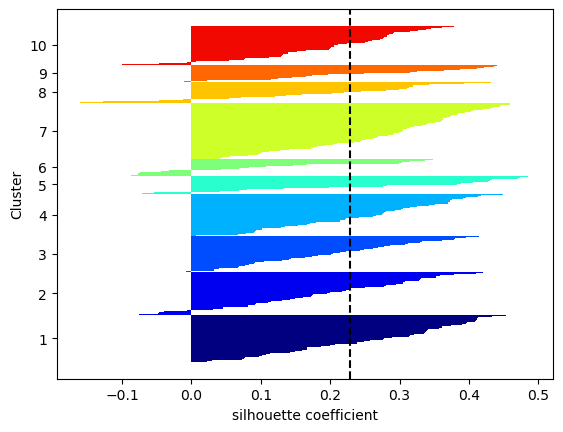

In [29]:
cluster_labels=np.unique(labels)
n_clusters=cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df_scaled, labels, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.0)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="black",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')

In [30]:
silhouette_avg

0.2285115287065165